# Diabetes Predictions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.datasets import load_diabetes

In [11]:
dataset = load_diabetes()
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [12]:
df_diabetes=pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [13]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [14]:
# Independent features
X = df_diabetes
# Dependent feature
y = dataset.target

In [16]:
# Traing and testing split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [17]:
## Correlation
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

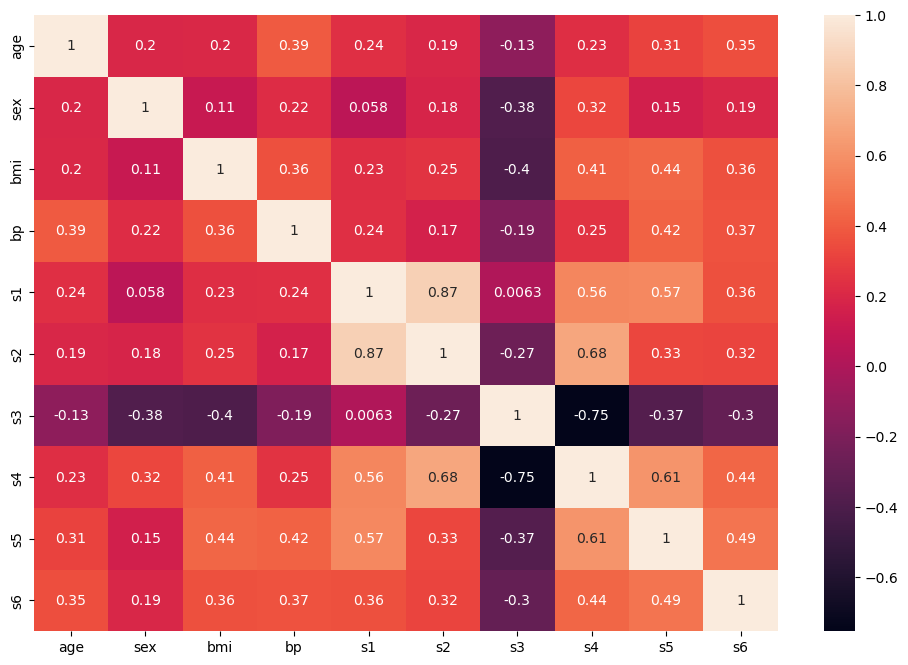

In [18]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=True)

In [19]:
from sklearn.tree import DecisionTreeRegressor

regressor=DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

## Hyperparameter Tuning

In [20]:
params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
grid = GridSearchCV(regressor, param_grid=params, cv=5, scoring='neg_mean_squared_error')

In [23]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [24]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': 'log2',
 'splitter': 'best'}

In [25]:
grid.best_score_

-3917.495159061344

In [26]:
# Predictions
y_pred = grid.predict(X_test)

In [27]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [28]:
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

R2 Score: 0.41282564865791405
MAE: 50.395156875766304
MSE: 3715.446170730782


In [33]:
best_regressor = DecisionTreeRegressor(criterion='friedman_mse', max_depth=4, max_features='log2', splitter='best')

In [34]:
best_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2')

[Text(0.5, 0.8333333333333334, 'x[8] <= 0.022\nsquared_error = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.5, 'x[0] <= 0.018\nsquared_error = 4016.257\nsamples = 205\nvalue = 123.444'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 3325.18\nsamples = 136\nvalue = 110.265'),
 Text(0.375, 0.16666666666666666, 'squared_error = 4361.258\nsamples = 69\nvalue = 149.42'),
 Text(0.75, 0.5, 'x[2] <= 0.056\nsquared_error = 4163.865\nsamples = 104\nvalue = 210.481'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 3463.866\nsamples = 76\nvalue = 192.947'),
 Text(0.875, 0.16666666666666666, 'squared_error = 2964.566\nsamples = 28\nvalue = 258.071')]

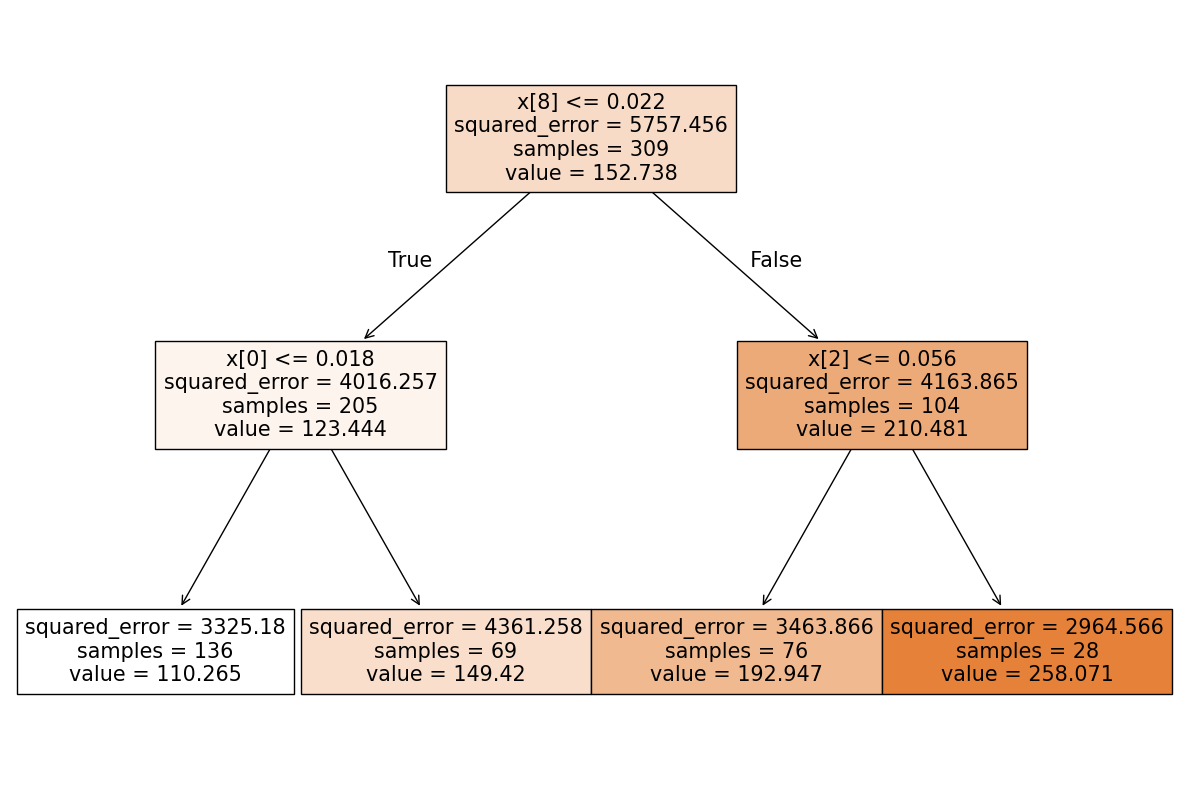

In [32]:
## Visualize the Decision Tree
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(best_regressor, filled=True)